# Workshop on PBHs - Friends of Friends Meeting, 2022
## Session 2 - Magnetic Field Generation from PBH distributions (Araya - Rubio)

# Needed packages

In [1]:
# From Joaquín Sureda's code

from cosmo import cosmology as cosmo
from constants import G,c
from Mass_Functions_FCT import dndM_brk_Ms as FCT 
from Mass_Functions_HC import dndM_brk_Ms as HC

# Integration module (by M. San Martín)

from special_integral import special_integral

#From Python

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.interpolate import InterpolatedUnivariateSpline
from special_integral import special_integral
from scipy import integrate
from scipy.integrate import quad
from scipy.integrate import quadrature
from tqdm import tqdm_notebook as tqdm

#Define some special functions

def Si(x):
    return special.sici(x)[0]

def Ci(x):
    return special.sici(x)[1]

# Initialize the cosmology 

In [2]:
c1 = cosmo()

# Mass function parameters

Mstar1 = 1.39e2
nb_FCT1 = 1.5
nb_HC = 3.0
ns = 0.9649

h_factor = 0.6736
z = 20.#1100.0 #Redshift
a = 1./(1. + z) #Scale factor

#Horizon radius in comoving coordinates

R_horizon = c1.horizon(a, iscomoving=True)

Cosmology defined with:
Om0 = 0.315  ;  Odm0 = 0.264  ;  Or0 = 9.237e-05  ;  h = 0.6736


# Mass functions and characteristic distance

## Plotting the mass functions

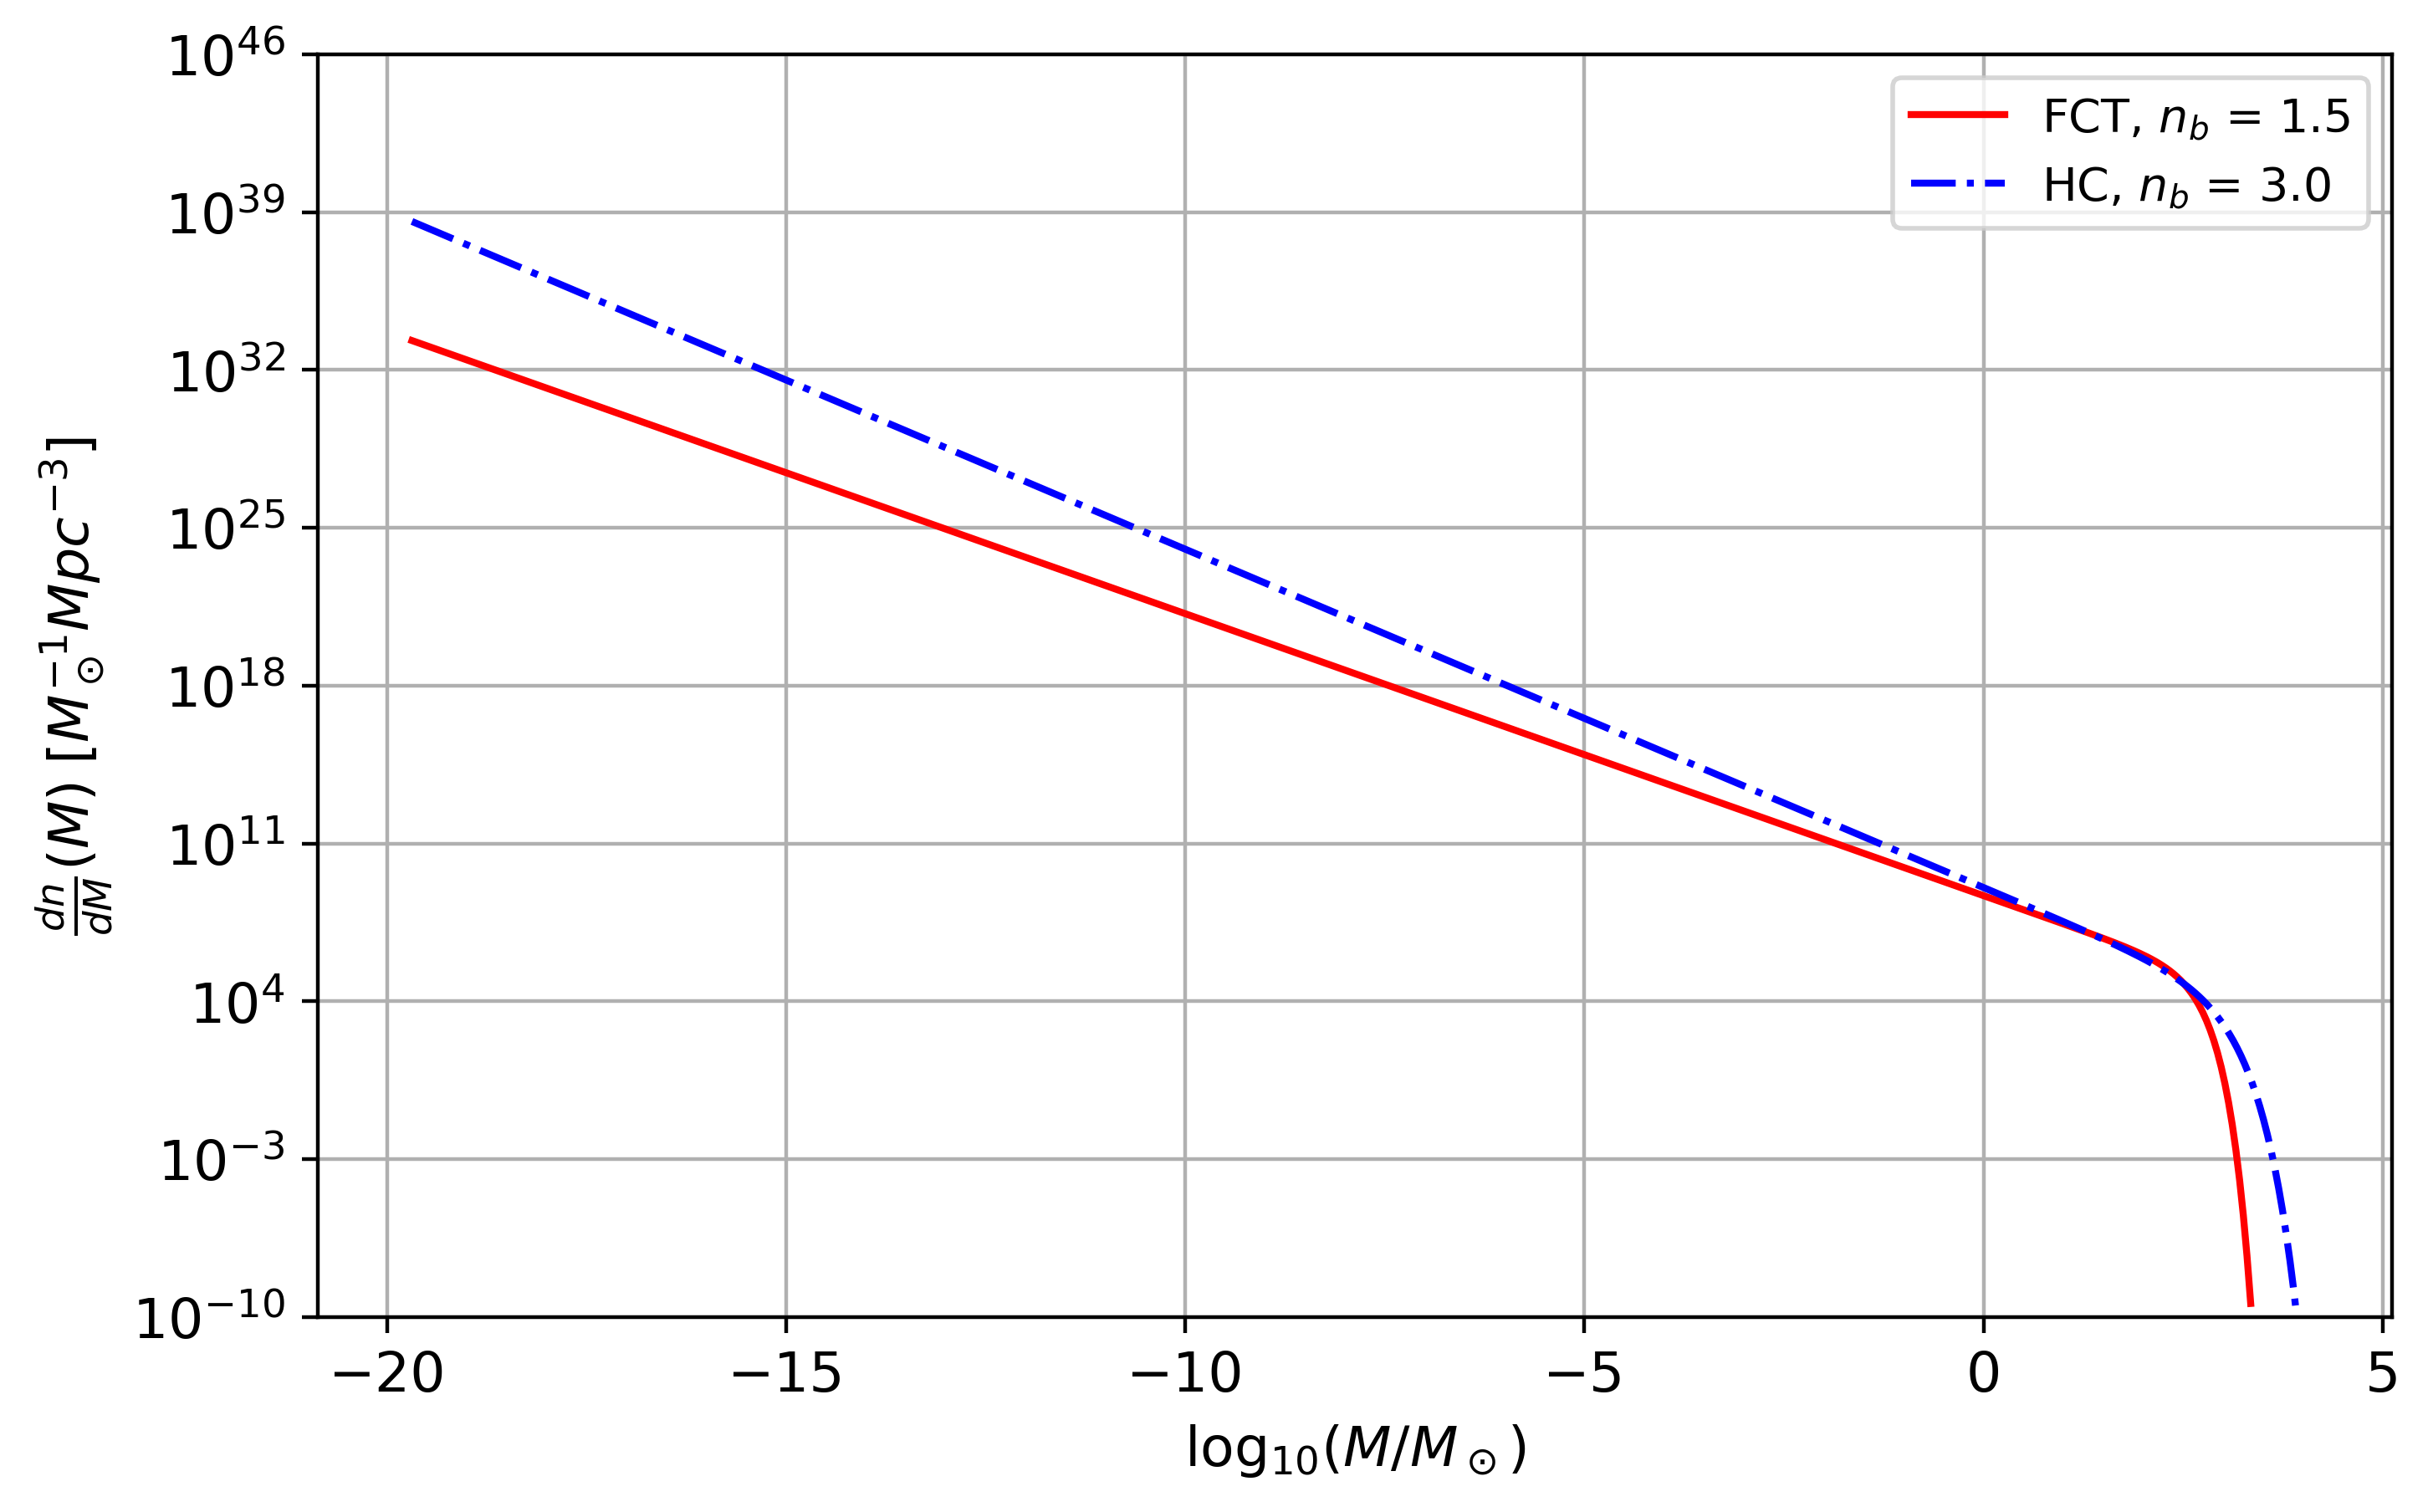

In [3]:
#Mass ranges

#Evaporated mass at z=20 (Thanks Juan!)
ini_LogMass = -20. + np.log10(2.041402)

final_LogMass_FCT1_Mstar1 = 3.3472791597546196
final_LogMass_HC_Mstar1   = 3.934821069027584

LogMass_FCT1_Mstar1 = np.linspace(ini_LogMass,final_LogMass_FCT1_Mstar1,500)
LogMass_HC_Mstar1   = np.linspace(ini_LogMass,final_LogMass_HC_Mstar1,500)

#Mass functions in FCT and HC scenarios

Mass_func_FCT1_Mstar1 = np.vectorize(FCT)(LogMass_FCT1_Mstar1,a,c1,M_star=Mstar1,nb=nb_FCT1)
Mass_func_HC_Mstar1   = np.vectorize(HC)(LogMass_HC_Mstar1,a,c1,M_star=Mstar1,nb=nb_HC)

def graph_function_FCT1_Mstar1(u):
    return FCT(u,a,c1,M_star=Mstar1,nb=nb_FCT1)

def graph_function_HC_Mstar1(u):
    return HC(u,a,c1,M_star=Mstar1,nb=nb_HC)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(8, 5), dpi=400)
ax = fig.add_subplot(111)
ax.semilogy(LogMass_FCT1_Mstar1,graph_function_FCT1_Mstar1(LogMass_FCT1_Mstar1), color='r', linestyle='-', label=r'FCT, $n_b$ = 1.5')
ax.semilogy(LogMass_HC_Mstar1,graph_function_HC_Mstar1(LogMass_HC_Mstar1), color='b', linestyle='-.', label=r'HC, $n_b$ = 3.0')
ax.set_ylabel(r'$\frac{dn}{dM}(M)\; [M_\odot^{-1} Mpc^{-3}]$')
ax.set_xlabel(r'$\log_{10}\left(M/M_\odot\right)$')
plt.ylim([10.**(-10.), 10.**(46.)])
plt.grid()
ax.legend()
plt.savefig('Mass-Functions.png')
plt.show()

# Characteristic distance between two equal-mass PBHs

## Integrating a function in log domain

Recall the characteristic distance between PBHs of mass $M$ is such that

$$
    \frac{1}{(d(M))^3}=\int_{M}^{\infty}{\frac{dn}{dM}}\simeq\int_{M}^{M1ph}{\frac{dn}{dM}}
$$

We need to compute

$$
\int_{M_1}^{M_2}{f(M)dM}
$$

but knowing $u\mapsto f(M(u))$, where $u:=\log(M)$. Then,

$$
\int_{M_1}^{M_2}{f(M)dM}=\int_{u_1}^{u_2}{f(M(u))10^{u}du}
$$

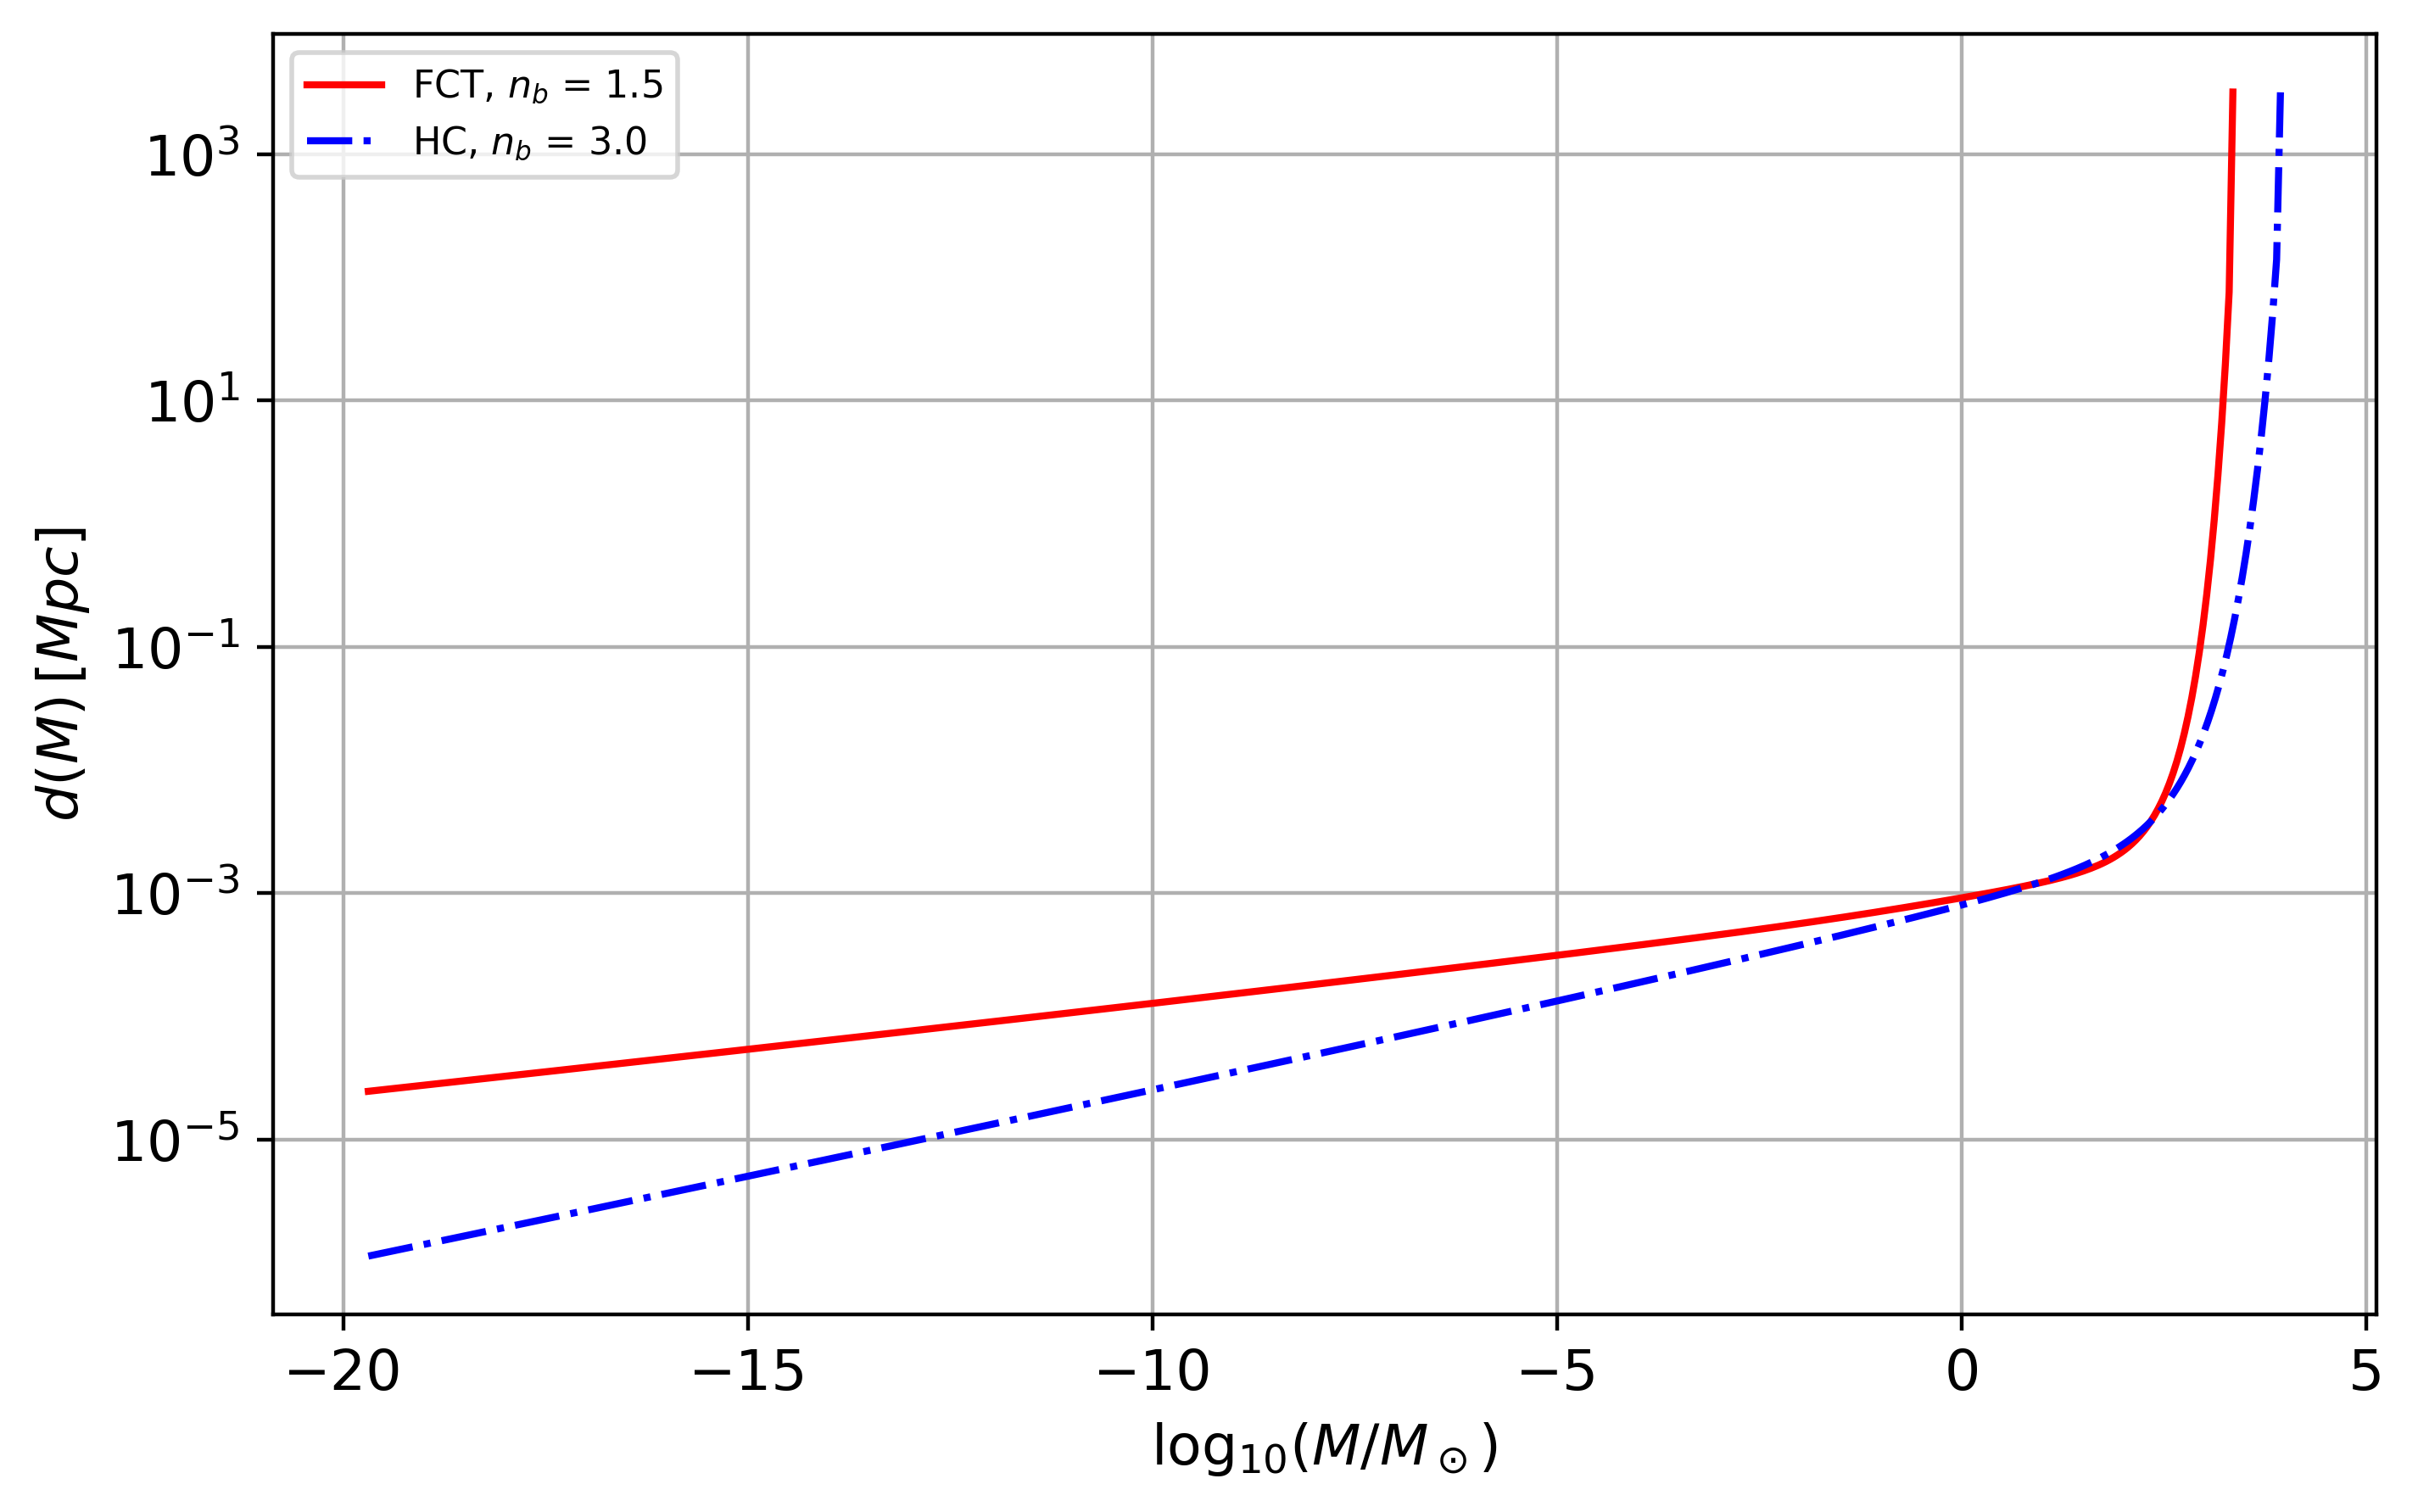

In [4]:
# MASS FUNCTIONS (WITH LOG JACOBIAN INCLUDED, FOR LOG INTEGRATION)

def Mfunction_FCT1_Mstar1(u):
    return FCT(u,a,c1,M_star=Mstar1,nb=nb_FCT1)*np.log(10.)*np.float_power(10.,u)

def Mfunction_HC_Mstar1(u):
    return HC(u,a,c1,M_star=Mstar1,nb=nb_HC)*np.log(10.)*np.float_power(10.,u)

#Characteristic Distances

def ch_distance_FCT1_Mstar1(u):
    if u < final_LogMass_FCT1_Mstar1:
        arg = quadrature(Mfunction_FCT1_Mstar1, u, final_LogMass_FCT1_Mstar1, tol=10000, rtol=10000, maxiter=500)[0]
        return (arg)**(-1./3.)
    else:
        return R_horizon
    
def ch_distance_HC_Mstar1(u):
    if u < final_LogMass_HC_Mstar1:
        arg = quadrature(Mfunction_HC_Mstar1, u, final_LogMass_HC_Mstar1, tol=10000, rtol=10000, maxiter=500)[0]
        return (arg)**(-1./3.)
    else:
        return R_horizon
    
#Vectorize them

d_FCT1_Mstar1 = np.vectorize(ch_distance_FCT1_Mstar1)
d_HC_Mstar1   = np.vectorize(ch_distance_HC_Mstar1)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig = plt.figure(figsize=(8, 5), dpi=400)
ax = fig.add_subplot(111)
ax.semilogy(LogMass_FCT1_Mstar1,d_FCT1_Mstar1(LogMass_FCT1_Mstar1), color='r', linestyle='-', label=r'FCT, $n_b$ = 1.5')
ax.semilogy(LogMass_HC_Mstar1,d_HC_Mstar1(LogMass_HC_Mstar1), color='b', linestyle='-.',label=r'HC, $n_b$ = 3.0')
ax.set_xlabel(r'$\log_{10}(M/M_\odot)$')
ax.set_ylabel(r'$d(M)\,[Mpc]$')
#ax.set_title("Characteristic Distance Functions")
plt.grid()
ax.legend()
plt.savefig('charact-distance.png')
plt.show()

# Matter Power Spectra ($z=20$)

Take data from Planck and Poisson, and interpolate them within the interested frequency range.

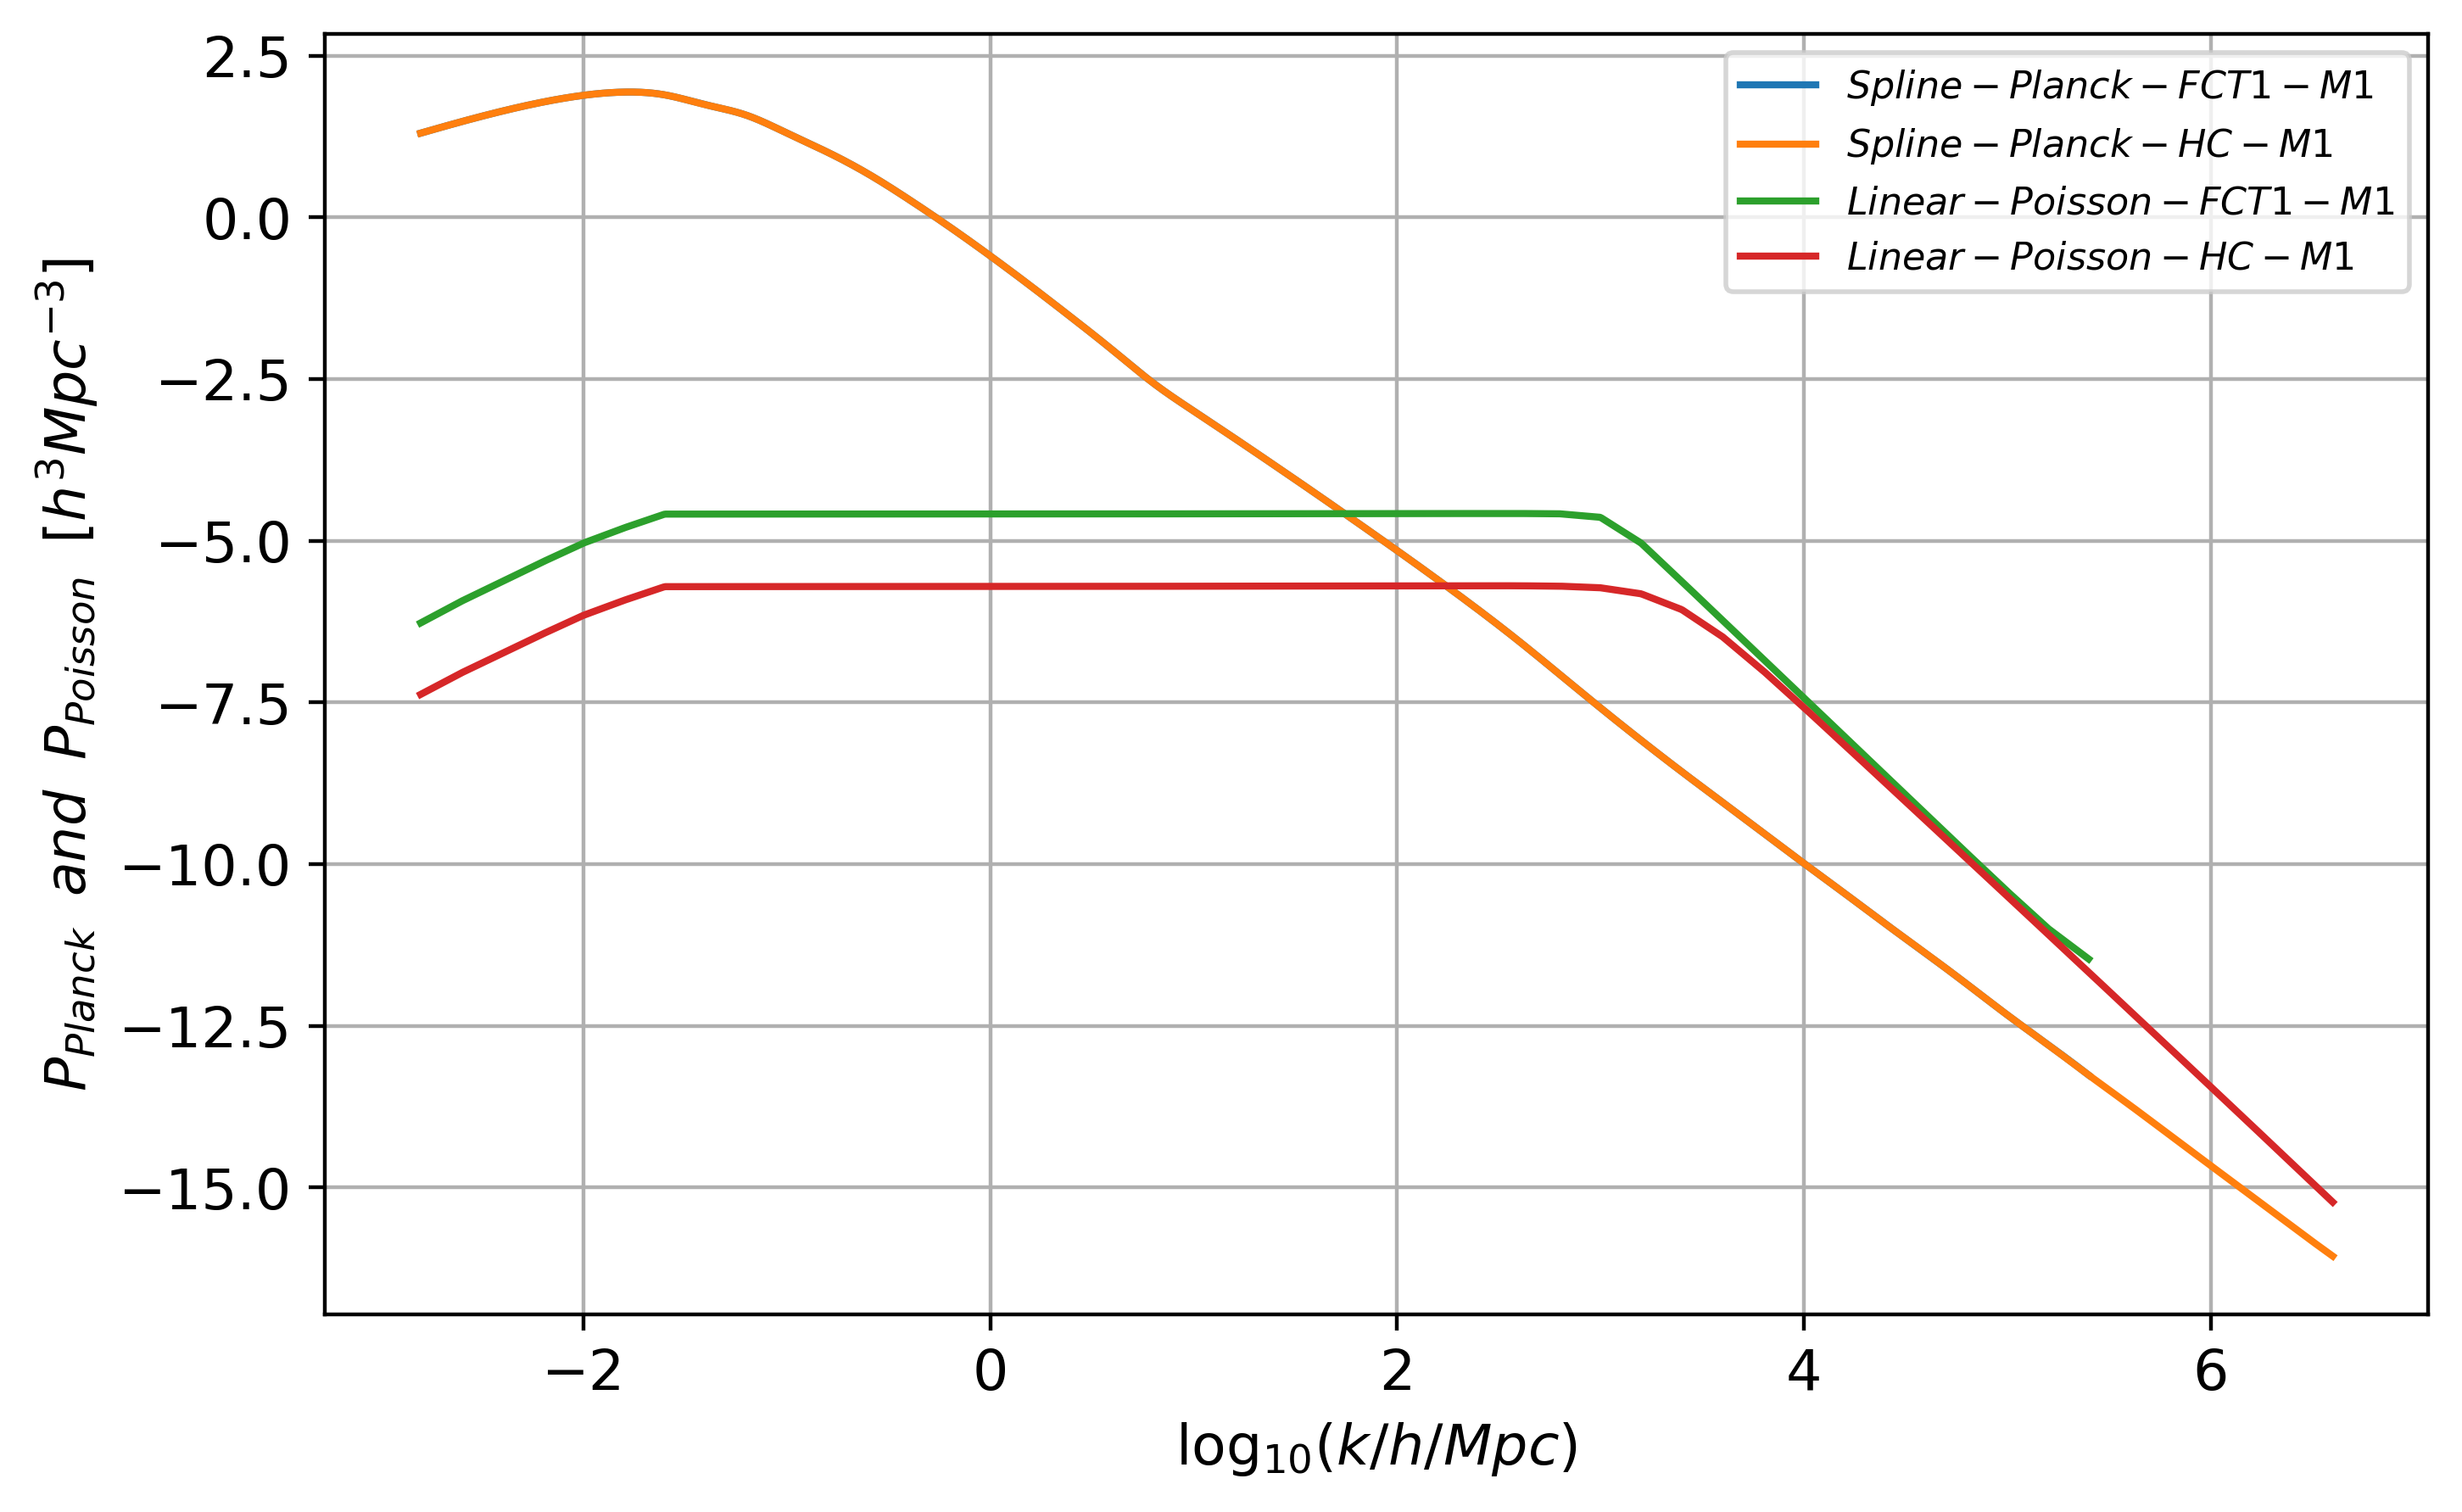

In [5]:
# Setting up frequency ranges

ini_Logk_FCT1_Mstar1   = np.log10(2. * np.pi / (d_FCT1_Mstar1(final_LogMass_FCT1_Mstar1)))
final_Logk_FCT1_Mstar1 = np.log10(2. * np.pi / (d_FCT1_Mstar1(ini_LogMass)))

ini_Logk_HC_Mstar1     = np.log10(2. * np.pi / (d_HC_Mstar1(final_LogMass_HC_Mstar1)))
final_Logk_HC_Mstar1   = np.log10(2. * np.pi / (d_HC_Mstar1(ini_LogMass)))

# PLANCK (los mismos datos, pero con los rangos de k adecuados)

DataPlanck_FCT1_Mstar1 = open('Planck-FCT1-Mstar1.dat', 'r')
Planck_FCT1_Mstar1     = [10.**(float(a.split()[1])) for a in DataPlanck_FCT1_Mstar1]

DataPlanck_HC_Mstar1   = open('Planck-HC-Mstar1.dat', 'r')
Planck_HC_Mstar1       = [10.**(float(a.split()[1])) for a in DataPlanck_HC_Mstar1]

# POISSON
# We compute Log_10(P_Poisson(k))/h^3/Mpc^3=log10(10**(-#14)+10**(2*#13))+#12 (con #1 la de los k's)

DataPoisson_FCT1_Mstar1 = open('Pk20_FCT_2_1.5.dat', 'r')
Poisson_FCT1_Mstar1     = [(10.**((-1.)*float(a.split()[13])) + 10.**(2.*float(a.split()[12])))*(10.**(float(a.split()[11]))) for a in DataPoisson_FCT1_Mstar1]

DataPoisson_HC_Mstar1   = open('Pk20_HC_2_3.0.dat', 'r')
Poisson_HC_Mstar1       = [((10.**(- float(a.split()[13])) + 10.**(2. * float(a.split()[12])))*10.**(float(a.split()[11]))) for a in DataPoisson_HC_Mstar1]

#Rangos de frecuencia

DataPlanck_FCT1_Mstar1 = open('Planck-FCT1-Mstar1.dat', 'r')
LogK_FCT1_Mstar1       = [float(a.split()[0]) for a in DataPlanck_FCT1_Mstar1]

DataPlanck_HC_Mstar1   = open('Planck-HC-Mstar1.dat', 'r')
LogK_HC_Mstar1         = [float(a.split()[0]) for a in DataPlanck_HC_Mstar1]

# Interpolated spectra!

k_bins = 1001

#log-log interpolation

Log_Planck_FCT1_Mstar1 = [np.log10(float(a)) for a in Planck_FCT1_Mstar1]
Log_Planck_HC_Mstar1   = [np.log10(float(a)) for a in Planck_HC_Mstar1]

Log_Poisson_FCT1_Mstar1 = [np.log10(float(a)) for a in Poisson_FCT1_Mstar1]
Log_Poisson_HC_Mstar1   = [np.log10(float(a)) for a in Poisson_HC_Mstar1]

#Dominio(resolución de la interpolación)

LogK_Int_FCT1_Mstar1 = np.linspace(min(LogK_FCT1_Mstar1), max(LogK_FCT1_Mstar1), num=k_bins)
LogK_Int_HC_Mstar1   = np.linspace(min(LogK_HC_Mstar1), max(LogK_HC_Mstar1), num=k_bins)

#INTERPOLACION SPLINE PARA PLANCK

SPlanck_FCT1_Mstar1 = InterpolatedUnivariateSpline(LogK_FCT1_Mstar1, Log_Planck_FCT1_Mstar1)(LogK_Int_FCT1_Mstar1)
SPlanck_HC_Mstar1   = InterpolatedUnivariateSpline(LogK_HC_Mstar1, Log_Planck_HC_Mstar1)(LogK_Int_HC_Mstar1)

#INTERPOLACION LINEAL PARA POISSON

LPoisson_FCT1_Mstar1 = np.interp(LogK_Int_FCT1_Mstar1, LogK_FCT1_Mstar1, Log_Poisson_FCT1_Mstar1)
LPoisson_HC_Mstar1   = np.interp(LogK_Int_HC_Mstar1, LogK_HC_Mstar1, Log_Poisson_HC_Mstar1)

#PLOTS

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig = plt.figure(figsize=(8, 5), dpi=400)
ax = fig.add_subplot(111)
plt.plot(LogK_Int_FCT1_Mstar1, SPlanck_FCT1_Mstar1, label=r'$Spline-Planck-FCT1-M1$')
plt.plot(LogK_Int_HC_Mstar1, SPlanck_HC_Mstar1, label=r'$Spline-Planck-HC-M1$')
plt.plot(LogK_Int_FCT1_Mstar1, LPoisson_FCT1_Mstar1, label=r'$Linear-Poisson-FCT1-M1$')
plt.plot(LogK_Int_HC_Mstar1, LPoisson_HC_Mstar1, label=r'$Linear-Poisson-HC-M1$')
ax.set_xlabel(r'$\log_{10}{\left(k/h/Mpc\right)}$')
ax.set_ylabel(r'$P_{Planck}\;\;and\;\; P_{Poisson}\;\;[h^3Mpc^{-3}]$')
plt.grid()
ax.legend()
plt.show()
plt.close()

## Matter Spectra

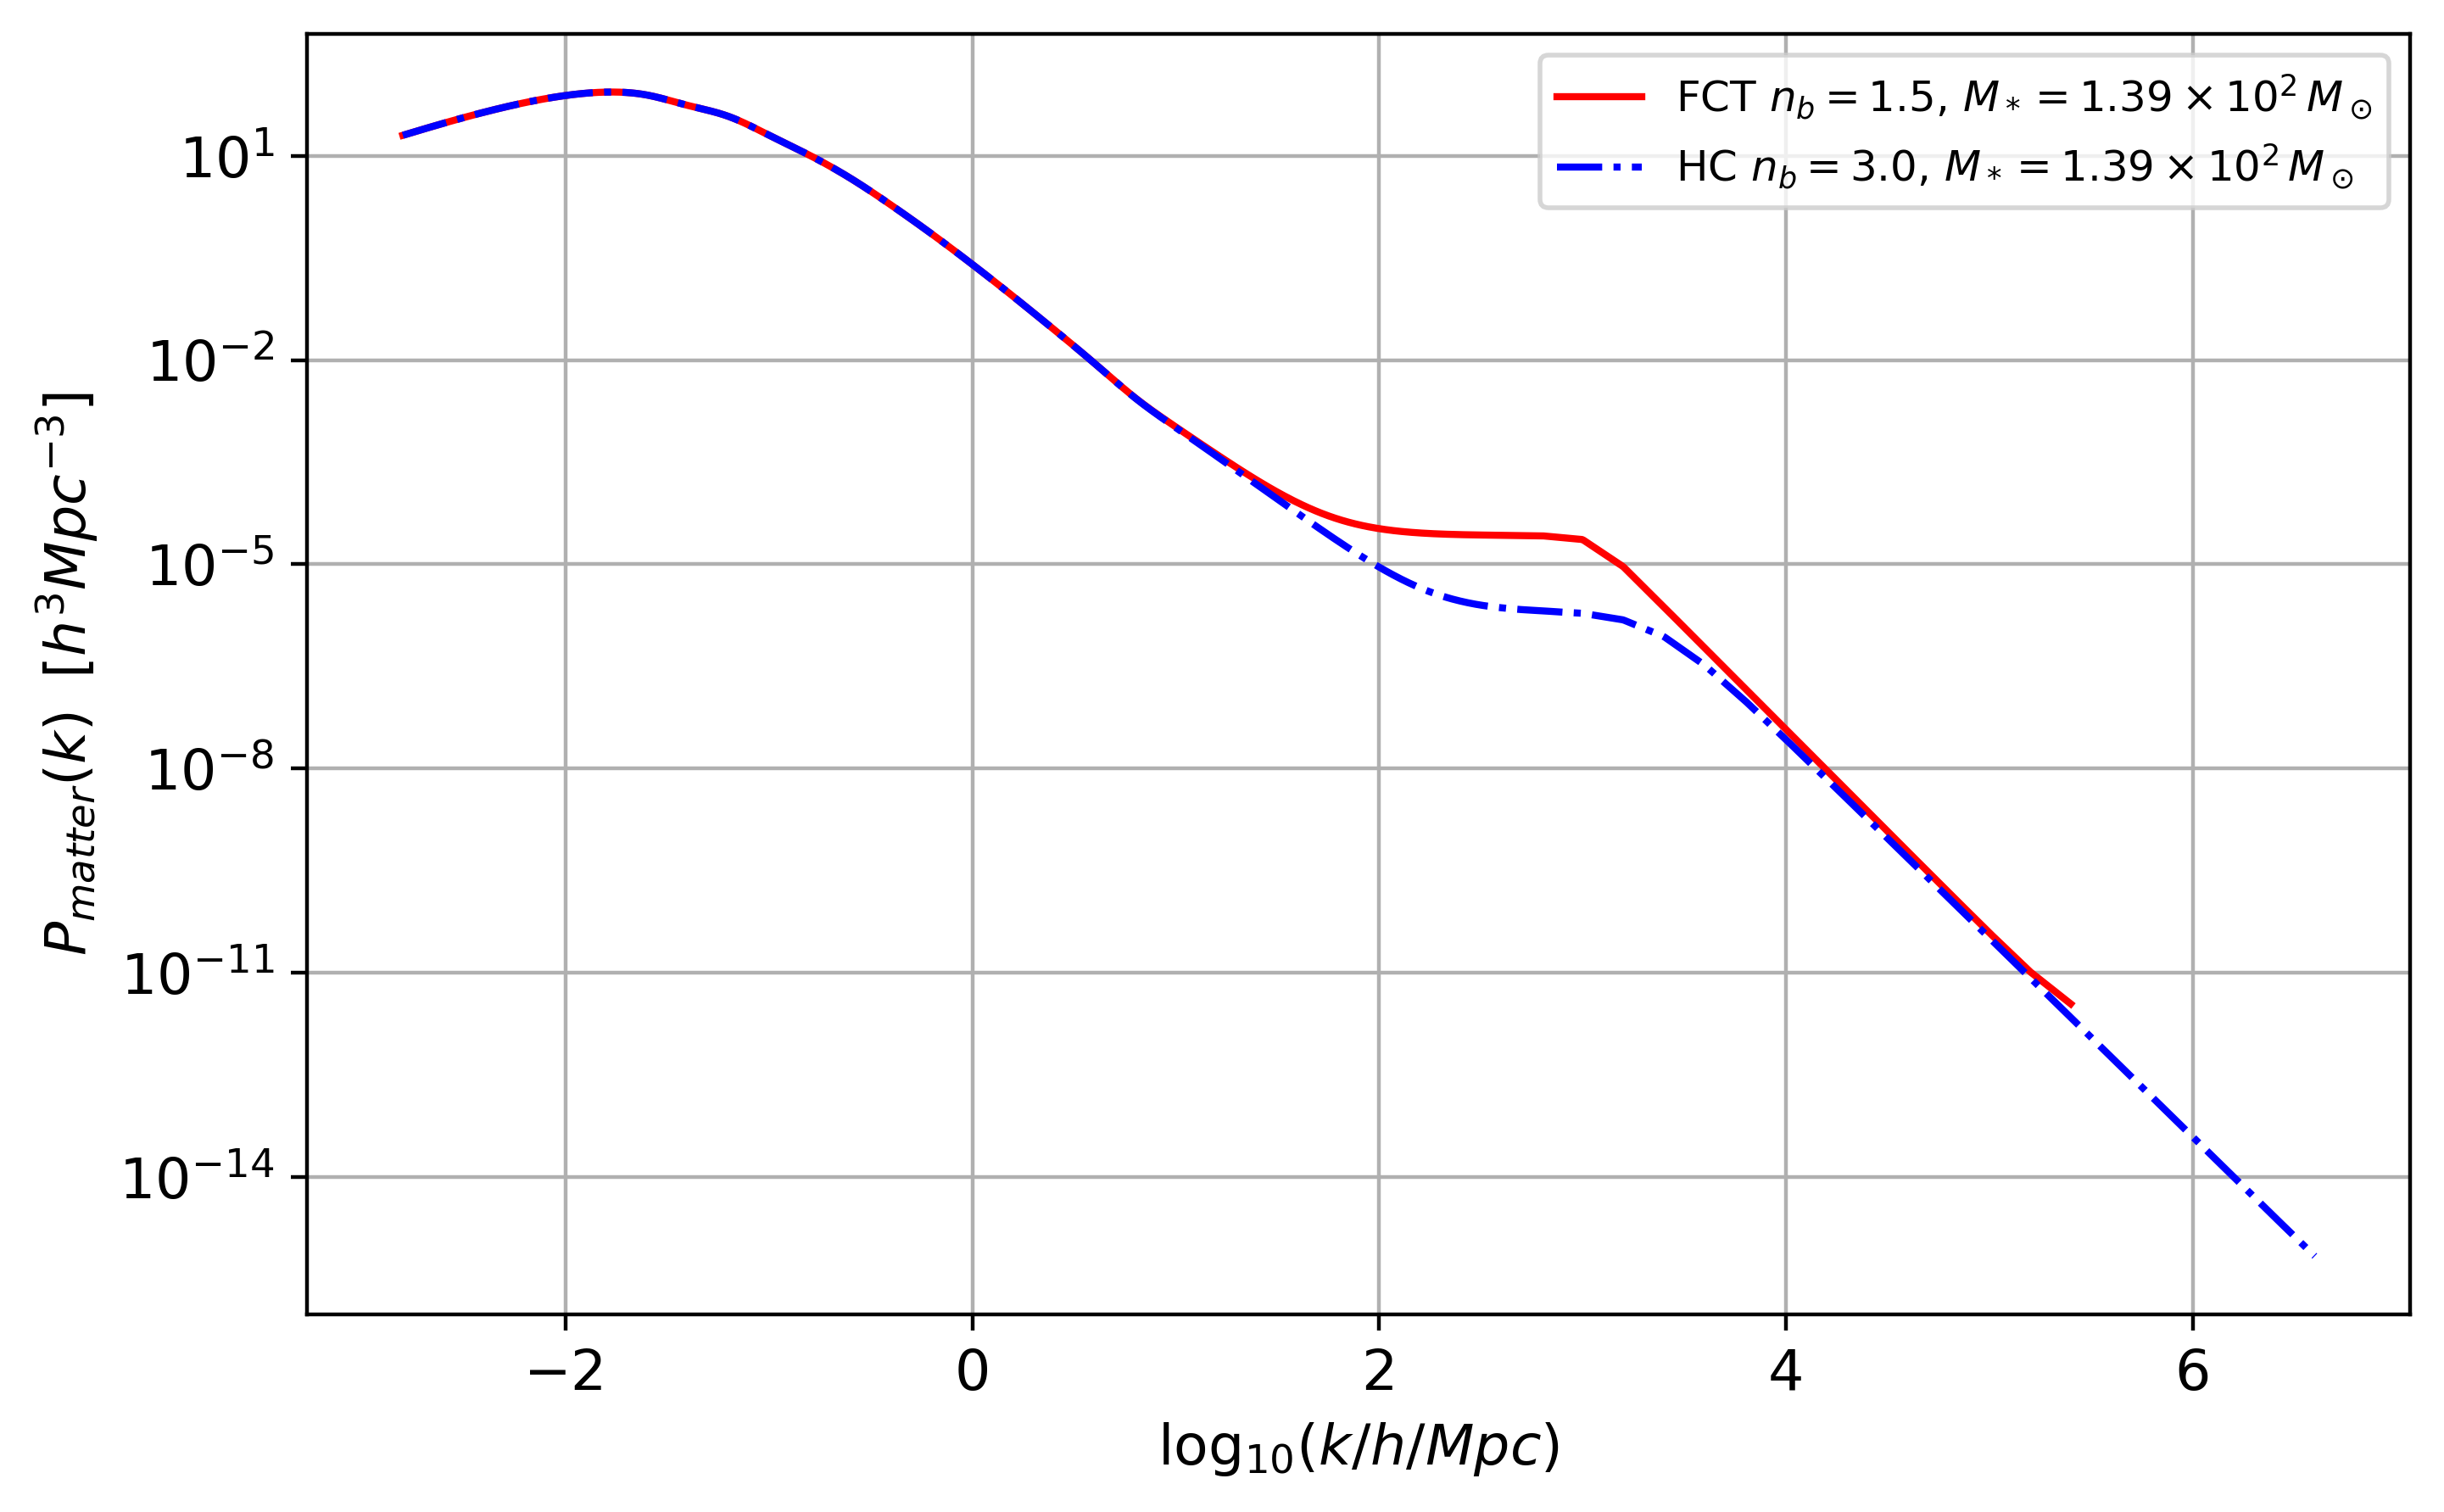

In [6]:
#(spline for Planck; Linear for Poisson)

Planck_10to_FCT1_Mstar1 = [10.**(float(a)) for a in SPlanck_FCT1_Mstar1]
Planck_10to_HC_Mstar1   = [10.**(float(a)) for a in SPlanck_HC_Mstar1]

Poisson_10to_FCT1_Mstar1 = [10.**(float(a)) for a in LPoisson_FCT1_Mstar1]
Poisson_10to_HC_Mstar1   = [10.**(float(a)) for a in LPoisson_HC_Mstar1]

Psum_FCT1_Mstar1 = []
Psum_HC_Mstar1   = []

for i in range(k_bins):
    Psum_FCT1_Mstar1.append(Planck_10to_FCT1_Mstar1[i] + Poisson_10to_FCT1_Mstar1[i])
    Psum_HC_Mstar1.append(Planck_10to_HC_Mstar1[i] + Poisson_10to_HC_Mstar1[i])
    
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig = plt.figure(figsize=(8, 5), dpi=400)
ax = fig.add_subplot(111)
plt.semilogy(LogK_Int_FCT1_Mstar1, Psum_FCT1_Mstar1, color='r', linestyle='-', label=r'FCT $n_b = 1.5$, $M_* = 1.39\times 10^2\,M_\odot$')
plt.semilogy(LogK_Int_HC_Mstar1, Psum_HC_Mstar1, color='b', linestyle='-.', label=r'HC $n_b = 3.0$, $M_* = 1.39\times 10^2\,M_\odot$')
ax.set_xlabel(r'$\log_{10}{\left(k/h/Mpc\right)}$')
ax.set_ylabel(r'$P_{matter}(k)\;\;[h^3Mpc^{-3}]$')
plt.grid()
ax.legend()
plt.savefig('MPS-extended-z20.png')
plt.show()
plt.close()

# Magnetic field generation from Biermann's battery

Biermann's battery predicts a mostly dipolar magnetic field, namely

$$
    B(M,r)\sim B_{*}(M)\left(\frac{r_{*}}{r}\right)^3
$$

Following the results by Safarzadeh (2018), we choose $r_*\simeq 4 r_{isco}$ and

$$
    B_{*}(M)\approx 10^{-2}\left[\frac{\text{Gauss}}{s}\right]\left(\frac{M}{5.0\, M_\odot}\right)^{-9/4}\left(\frac{G M}{r_*^3}\right)^{-1/2}.
$$

We also assume that all the PBHs have maximum rotation speed. With this reference value, let's estimate the contribution to the magnetic field generated by each PBH, at redshift $z$, as

$$
B(M,|\vec{x}^{\prime}-\vec{x}|, z) = \frac{B_{*}(M)}{a(z)^3}\left( \frac{r_*}{|\vec{x}^{\prime}-\vec{x}|}\right)^3
$$

where $a(z)$ is the cosmological scale factor at redshift $z$, and the interval $|\vec{x}^{\prime}-\vec{x}|$ is measured in comoving coordinates.

Then, the magnetic field strenght produced by the whole population is

$$
\delta B_i (\vec{x}, z) = \int_{\mathbb{R}^{3}} \mathcal{C}F_{B}\left(\left\vert \vec{x}^{\prime}-\vec{x}\right\vert ,z\right)  \delta(
\vec{x}^{\prime}, z)  d^{3}\vec{x}^{\prime},
$$

where

$$
    F_{B}(r,z)=\int_{0}^{\infty}\frac{dn}{dM}\,B(M,r, z)\,S\left(\frac{r}{d(M)}\right)\,dM,
$$

In [7]:
# Compute the r_isco

def r_isco(u):
    M = np.float_power(10.,u)
    x = 1. 
    z1 = 1. + (1. - x**2.)**(1./3.) * ((1. + x)**(1./3.) + (1. - x)**(1./3.))
    z2 = (3. * x**2. + z1**2.)**(1./2.)
    corr = 3. + z2 - ((3.-z1)*(3.+z1+2.*z2))**(1./2.)
    risco = (G*M/c**2.) * corr 
    
    return risco

# Magnetic field generated by 1PBH set up

def B_Biermann_4_r_isco(u):

    risco = r_isco(u)
    M = np.float_power(10.,u)
    dBdt = 0.01 * (M/5.)**(-9./4.) #G/s
    omega = (G*M/(4.*risco)**3.)**(1./2.)
    tau = 1./omega 

    return tau*dBdt

# Integrands of |F_Bhat|^2

#Set the orientation parameter C to the largest possible

C = 1.

def integrand_Biermann_FCT1_Mstar1(LogMass, w):

    k = np.float_power(10.,w)
    M = np.float_power(10.,LogMass)
    dndM = Mfunction_FCT1_Mstar1(LogMass)
    B_isco = B_Biermann_4_r_isco(LogMass)
    risco = r_isco(LogMass)
    I_tita = 4. * np.pi * (2./(k * d_FCT1_Mstar1(LogMass)) * np.sin(k * d_FCT1_Mstar1(LogMass) / 2.) - Ci(k * d_FCT1_Mstar1(LogMass) / 2.))

    return C * dndM * B_isco * (4.*risco)**3. / (a**3.) * I_tita

def integrand_Biermann_HC_Mstar1(LogMass, w):

    k = np.float_power(10.,w)
    M = np.float_power(10.,LogMass)
    dndM = Mfunction_HC_Mstar1(LogMass)
    B_isco = B_Biermann_4_r_isco(LogMass)
    risco = r_isco(LogMass)
    I_tita = 4. * np.pi * (2./(k * d_HC_Mstar1(LogMass)) * np.sin(k * d_HC_Mstar1(LogMass) / 2.) - Ci(k * d_HC_Mstar1(LogMass) / 2.))

    return C * dndM * B_isco * (4.*risco)**3. / (a**3.) * I_tita

# F_Bhat Biermann

def F_B_hat_Biermann_FCT1_Mstar1(w):
    return quadrature(integrand_Biermann_FCT1_Mstar1, ini_LogMass, final_LogMass_FCT1_Mstar1, args=(w), tol=10000, rtol=10000, maxiter=500)[0]

def F_B_hat_Biermann_HC_Mstar1(w):
    return quadrature(integrand_Biermann_HC_Mstar1, ini_LogMass, final_LogMass_HC_Mstar1, args=(w), tol=10000, rtol=10000, maxiter=500)[0]

#Vectorize them

function_F_B_hat_Biermann_FCT1_Mstar1 = np.vectorize(F_B_hat_Biermann_FCT1_Mstar1)
function_F_B_hat_Biermann_HC_Mstar1   = np.vectorize(F_B_hat_Biermann_HC_Mstar1)

In [8]:
SqFBhat_Biermann_FCT1_Mstar1 = [(F_B_hat_Biermann_FCT1_Mstar1(a))**2. for a in LogK_Int_FCT1_Mstar1]
SqFBhat_Biermann_HC_Mstar1   = [(F_B_hat_Biermann_HC_Mstar1(a))**2. for a in LogK_Int_HC_Mstar1]

# 'Normalized' version

MagSp_Biermann_FCT1_Mstar1 = []
MagSp_Biermann_HC_Mstar1   = []

for i in range(k_bins):
    MagSp_Biermann_FCT1_Mstar1.append((10.**(3.*LogK_Int_FCT1_Mstar1[i]))/(2.*np.pi**2.)*SqFBhat_Biermann_FCT1_Mstar1[i]*Psum_FCT1_Mstar1[i])
    MagSp_Biermann_HC_Mstar1.append((10.**(3.*LogK_Int_HC_Mstar1[i]))/(2.*np.pi**2.)*SqFBhat_Biermann_HC_Mstar1[i]*Psum_HC_Mstar1[i])

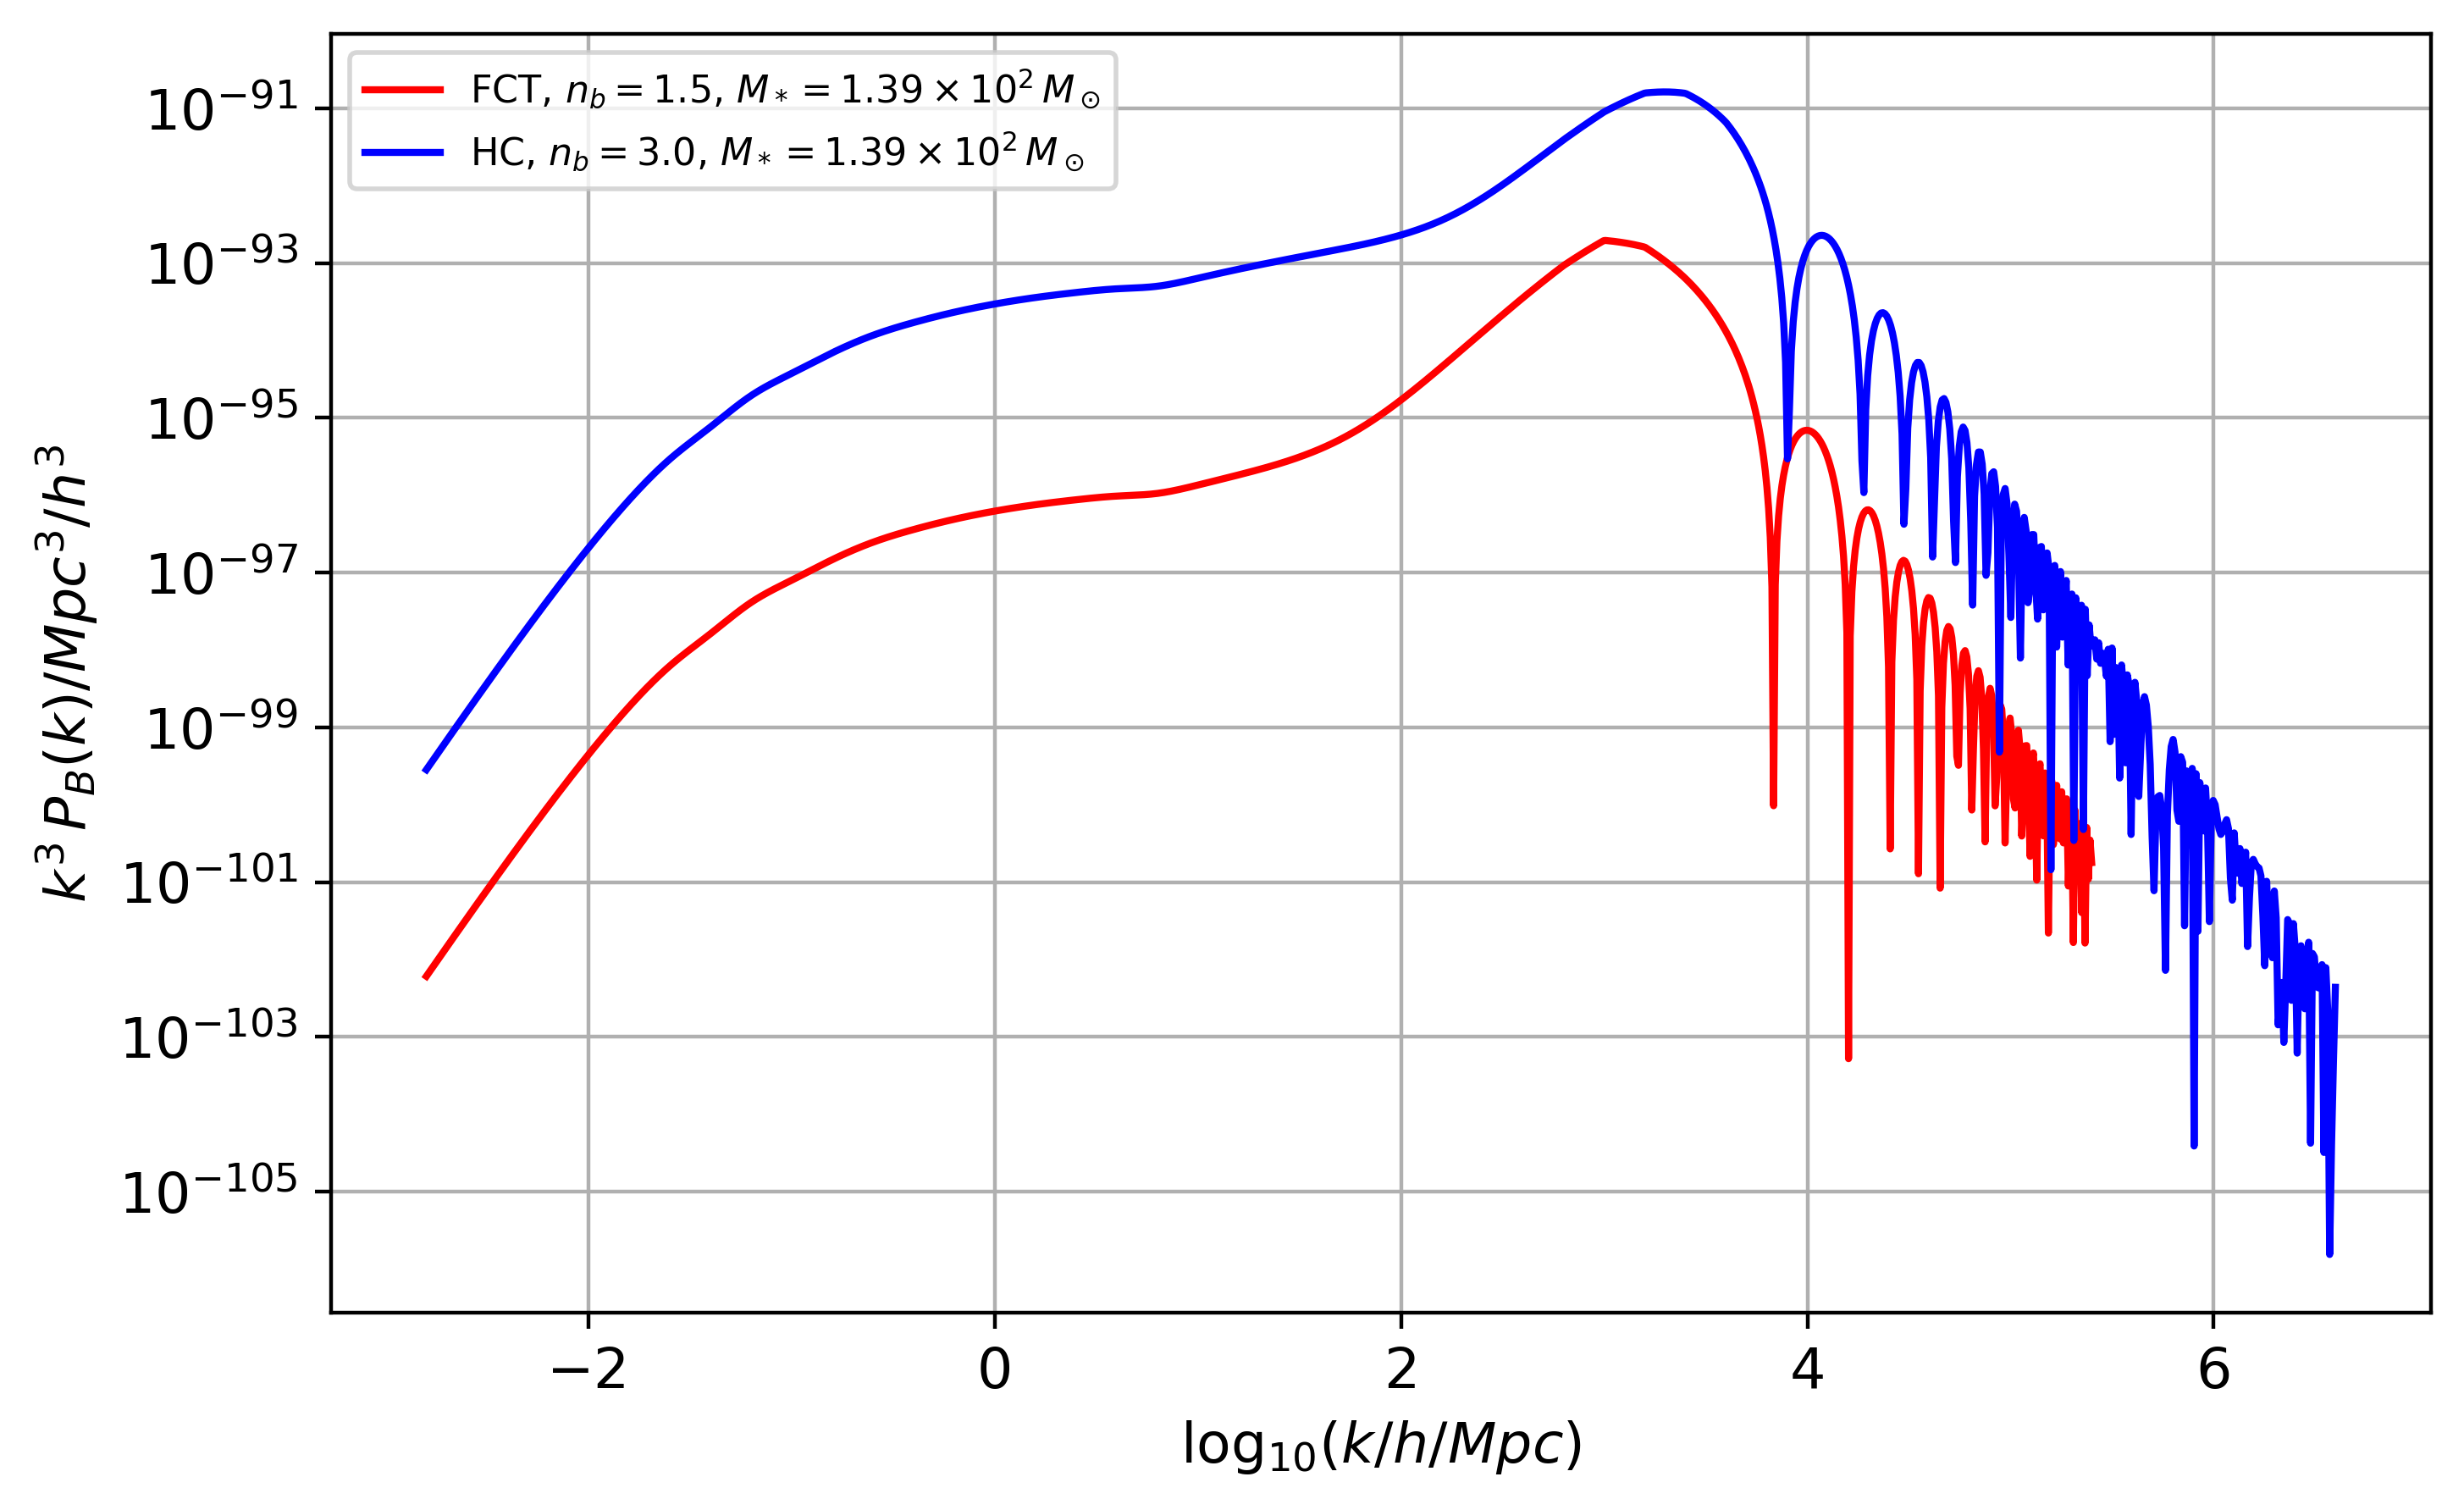

In [9]:
#Biermann PLOT

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig = plt.figure(figsize=(8, 5), dpi=400)
ax = fig.add_subplot(111)
plt.semilogy(LogK_Int_FCT1_Mstar1, MagSp_Biermann_FCT1_Mstar1, color='r', linestyle='-', label=r'FCT, $n_b = 1.5$, $M_* = 1.39\times 10^2\,M_\odot$')
plt.semilogy(LogK_Int_HC_Mstar1, MagSp_Biermann_HC_Mstar1, color='b', linestyle='-', label=r'HC, $n_b = 3.0$, $M_* = 1.39\times 10^2\,M_\odot$')
ax.set_xlabel(r'$\log_{10}{\left(k/h/Mpc\right)}$')
ax.set_ylabel(r'$k^3\,P_B(k)/Mpc^3/h^3$')
plt.grid()
ax.legend()
plt.savefig('Biermann-PowerSpectrum.png')
plt.show()
plt.close()

In [10]:
# Magnetic Average

L_jacob_FCT1_Mstar1 = [(np.log(10.) * 10.**(3.*u)) for u in LogK_Int_FCT1_Mstar1]
L_jacob_HC_Mstar1   = [(np.log(10.) * 10.**(3.*u)) for u in LogK_Int_HC_Mstar1]

lambda_par = 0.002 #Mpc

WF_FCT1_Mstar1 = [(1. / (2. * np.pi**2.)) * (np.exp(- lambda_par**2. * 10.**(2.*u))) for u in LogK_Int_FCT1_Mstar1]
WF_HC_Mstar1   = [(1. / (2. * np.pi**2.)) * (np.exp(- lambda_par**2. * 10.**(2.*u))) for u in LogK_Int_HC_Mstar1]

product_Bier_FCT1_Mstar1 = []
product_Bier_HC_Mstar1   = []

for i in range(k_bins):
    product_Bier_FCT1_Mstar1.append(WF_FCT1_Mstar1[i]*SqFBhat_Biermann_FCT1_Mstar1[i]*Psum_FCT1_Mstar1[i]*L_jacob_FCT1_Mstar1[i])
    product_Bier_HC_Mstar1.append(WF_HC_Mstar1[i]*SqFBhat_Biermann_HC_Mstar1[i]*Psum_HC_Mstar1[i]*L_jacob_HC_Mstar1[i])

int_product_Bier_FCT1_Mstar1 = integrate.simps(product_Bier_FCT1_Mstar1, LogK_Int_FCT1_Mstar1)
int_product_Bier_HC_Mstar1   = integrate.simps(product_Bier_HC_Mstar1, LogK_Int_HC_Mstar1)

Average_B_Biermann_FCT1_Mstar1 = (int_product_Bier_FCT1_Mstar1)**(1./2.)
Average_B_Biermann_HC_Mstar1   = (int_product_Bier_HC_Mstar1)**(1./2.)

print("-----------------------------------------------------")
print("B_Biermann_FCT1_Mstar1 = ", Average_B_Biermann_FCT1_Mstar1)
print("B_Biermann_HC_Mstar1   = ", Average_B_Biermann_HC_Mstar1)

-----------------------------------------------------
B_Biermann_FCT1_Mstar1 =  1.6509627130221326e-47
B_Biermann_HC_Mstar1   =  1.3080829601489237e-46


___________________________________________________________________

# Activity: PMFs from monopole accretion 

Imagine than magnetic monoples exist (!), and they can be accreted by the population of PBHs studied before.

We wonder: how much possible could be that the primordial magnetic field intensity needed to seed the current measurments have been generated from the accretion of magnetic monopoles?

In order to see this:

First Part: fixing  the constant $K$
--

1. Compute the average magnetic field generated by the accretion of monopoles onto the PBH population, assuming K=1.
2. For each one of the cosmological scenarios taken into account for the Biermann battery mechanism, estimate the minimum value of K such the the average magnetic field generated by the PBHs from monopole accretion is equal or greater than order $10^{-30}$ G at $z=20$.
3. Get back to the computation of the magnetic power spectra for this generation mechanism, with the new values for constant K.

In [11]:
# Set K factors to 1 and then rescale them

K_Maldacena_FCT1_Mstar1 =  3.45970943120787e-44 # These are the correct values
K_Maldacena_HC_Mstar1   =  3.07368870920075e-45

In [12]:
# Integrands of |F_Bhat|^2 in Maldacena's case (with Tita and Montecarlo WFs, in FCT1, FCT2 and HC)

special_integral = np.vectorize(special_integral)

def integrand_Maldacena_FCT1_Mstar1(LogMass, Logk):

    k = np.float_power(10., Logk)
    M = np.float_power(10., LogMass)
    dndM = Mfunction_FCT1_Mstar1(LogMass) #Ya tiene el jacobiando para la integral en log
    B_Maldacena = K_Maldacena_FCT1_Mstar1 * M**(1./2.)
    arg_Montec = 1.6 / (k * d_FCT1_Mstar1(LogMass))**3.
    I_Mald_Montecarlo = (4. * np.pi / k) * special_integral(2., arg_Montec)

    return dndM * (B_Maldacena / (a**2.)) * I_Mald_Montecarlo

def integrand_Maldacena_HC_Mstar1(LogMass, Logk):

    k = np.float_power(10., Logk)
    M = np.float_power(10., LogMass)
    dndM = Mfunction_HC_Mstar1(LogMass) #Ya tiene el jacobiando para la integral en log
    B_Maldacena = K_Maldacena_HC_Mstar1 * M**(1./2.)
    arg_Montec = 1.6 / (k * d_HC_Mstar1(LogMass))**3.
    I_Mald_Montecarlo = (4. * np.pi / k) * special_integral(2., arg_Montec)

    return dndM * (B_Maldacena / (a**2.)) * I_Mald_Montecarlo

# F_Bhat Maldacena

def F_B_hat_Mald_FCT1_Mstar1(w):
    return quadrature(integrand_Maldacena_FCT1_Mstar1, ini_LogMass, final_LogMass_FCT1_Mstar1, args=(w), tol=10000, rtol=10000, maxiter=500)[0]

def F_B_hat_Mald_HC_Mstar1(w):
    return quadrature(integrand_Maldacena_HC_Mstar1, ini_LogMass, final_LogMass_HC_Mstar1, args=(w), tol=10000, rtol=10000, maxiter=500)[0]

#Vectorize them 

function_F_B_hat_Mald_FCT1_Mstar1 = np.vectorize(F_B_hat_Mald_FCT1_Mstar1)
function_F_B_hat_Mald_HC_Mstar1   = np.vectorize(F_B_hat_Mald_HC_Mstar1)

SqFBhat_Mald_FCT1_Mstar1 = [(F_B_hat_Mald_FCT1_Mstar1(a))**2. for a in LogK_Int_FCT1_Mstar1]
SqFBhat_Mald_HC_Mstar1   = [(F_B_hat_Mald_HC_Mstar1(a))**2. for a in LogK_Int_HC_Mstar1]

# 'Normalized' version

MagSp_Mald_FCT1_Mstar1 = []
MagSp_Mald_HC_Mstar1   = []

for i in range(k_bins):
    MagSp_Mald_FCT1_Mstar1.append((10.**(3.*LogK_Int_FCT1_Mstar1[i]))/(2.*np.pi**2.)*SqFBhat_Mald_FCT1_Mstar1[i]*Psum_FCT1_Mstar1[i])
    MagSp_Mald_HC_Mstar1.append((10.**(3.*LogK_Int_HC_Mstar1[i]))/(2.*np.pi**2.)*SqFBhat_Mald_HC_Mstar1[i]*Psum_HC_Mstar1[i])

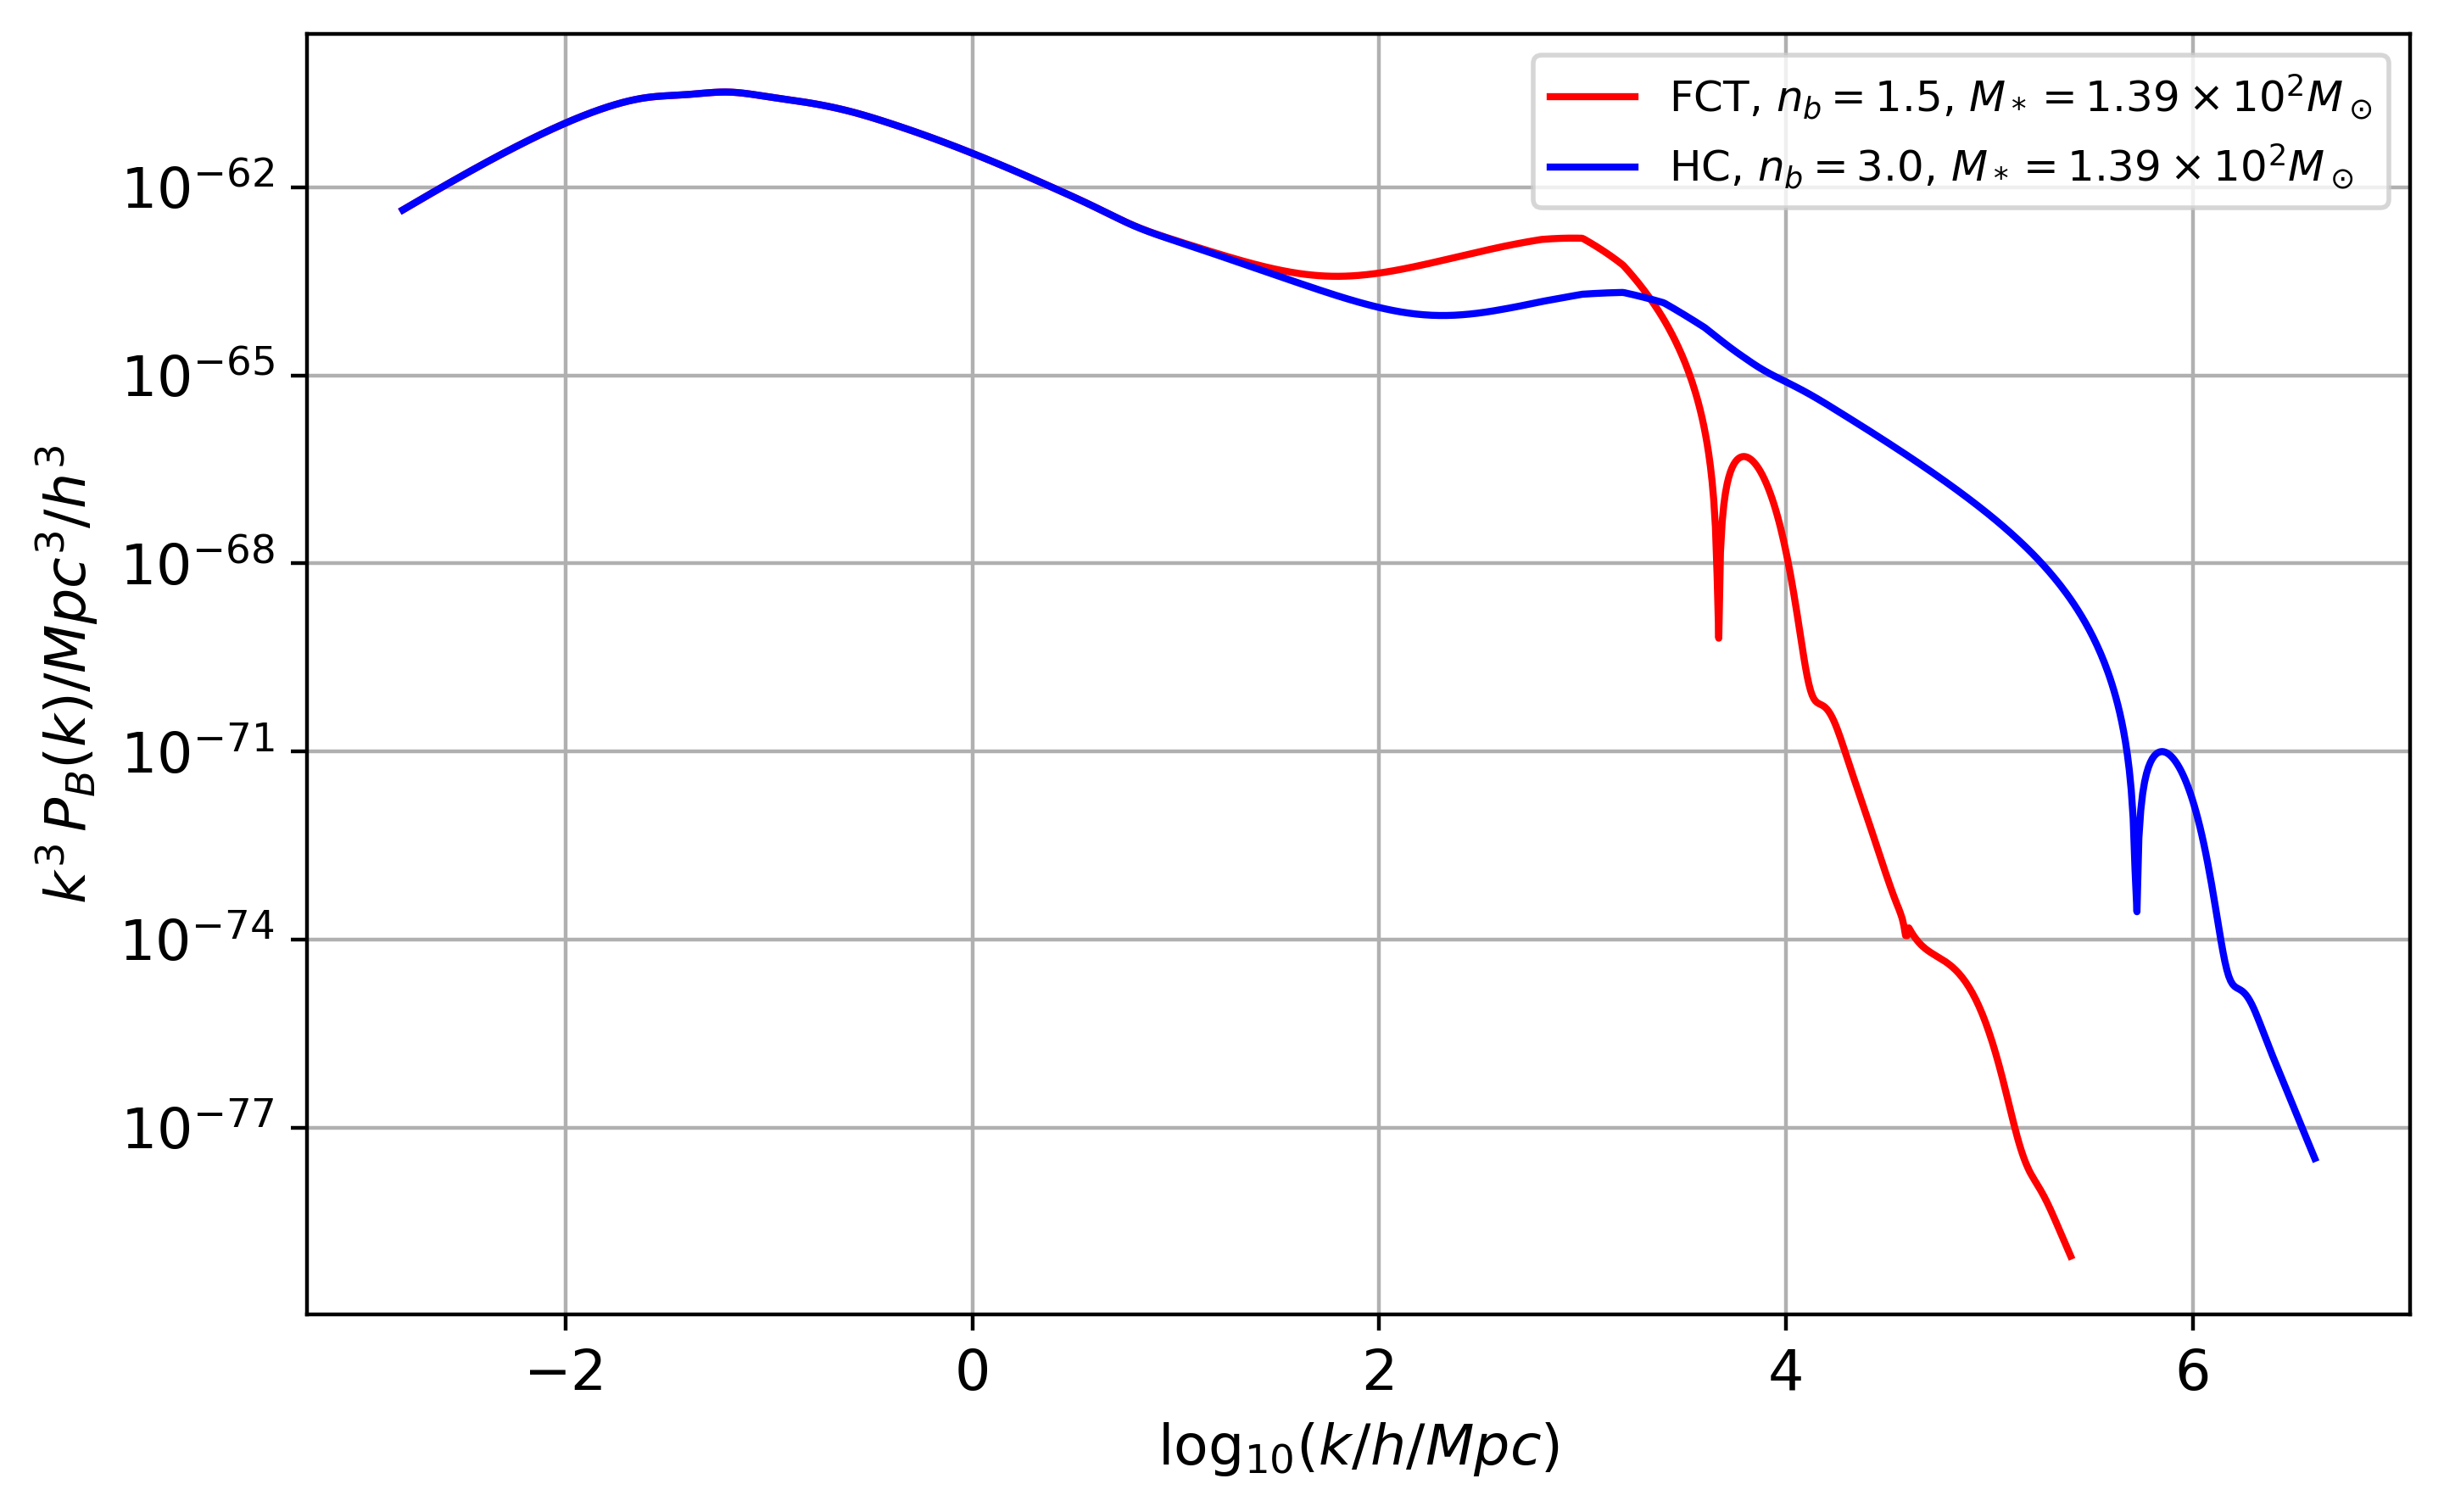

In [13]:
#Maldacena PLOTS

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig = plt.figure(figsize=(8, 5), dpi=400)
ax = fig.add_subplot(111)
plt.semilogy(LogK_Int_FCT1_Mstar1, MagSp_Mald_FCT1_Mstar1, color='r', linestyle='-', label=r'FCT, $n_b = 1.5$, $M_* = 1.39\times 10^{2} M_\odot$')
plt.semilogy(LogK_Int_HC_Mstar1, MagSp_Mald_HC_Mstar1, color='b', linestyle='-', label=r'HC, $n_b = 3.0$, $M_* = 1.39\times 10^{2} M_\odot$')
ax.set_xlabel(r'$\log_{10}{\left(k/h/Mpc\right)}$')
ax.set_ylabel(r'$k^3\,P_B(k)/Mpc^3/h^3$')
plt.grid()
ax.legend()
plt.savefig('Maldacena-PowerSpectrum.png')
plt.show()
plt.close()

In [14]:
product_Mald_FCT1_Mstar1 = []
product_Mald_HC_Mstar1   = []

for i in range(k_bins):
    product_Mald_FCT1_Mstar1.append(WF_FCT1_Mstar1[i]*SqFBhat_Mald_FCT1_Mstar1[i]*Psum_FCT1_Mstar1[i]*L_jacob_FCT1_Mstar1[i])
    product_Mald_HC_Mstar1.append(WF_HC_Mstar1[i]*SqFBhat_Mald_HC_Mstar1[i]*Psum_HC_Mstar1[i]*L_jacob_HC_Mstar1[i])
    

int_product_Mald_FCT1_Mstar1 = integrate.simps(product_Mald_FCT1_Mstar1, LogK_Int_FCT1_Mstar1)
int_product_Mald_HC_Mstar1   = integrate.simps(product_Mald_HC_Mstar1, LogK_Int_HC_Mstar1)

Average_B_Mald_FCT1_Mstar1 = (int_product_Mald_FCT1_Mstar1)**(1./2.)
Average_B_Mald_HC_Mstar1   = (int_product_Mald_HC_Mstar1)**(1./2.)

print("-----------------------------------------------------")
print("B_Mald_FCT1_Mstar1 con K_mald unidad = ", Average_B_Mald_FCT1_Mstar1)
print("B_Mald_HC_Mstar1 con K_mald unidad   = ", Average_B_Mald_HC_Mstar1)

-----------------------------------------------------
B_Mald_FCT1_Mstar1 con K_mald unidad =  1.0e-30
B_Mald_HC_Mstar1 con K_mald unidad   =  1.0e-30


In [15]:
#Ajustamos K_Maldacena para que de del orden de 10^{-30}

K_Mald_FCT1_Mstar1 = 10.**(-30) / Average_B_Mald_FCT1_Mstar1
K_Mald_HC_Mstar1   = 10.**(-30) / Average_B_Mald_HC_Mstar1

print("-----------------------------------------------------")
print("K_Maldacena_FCT1_Mstar1 = ", K_Mald_FCT1_Mstar1)
print("K_Maldacena_HC_Mstar1   = ", K_Mald_HC_Mstar1)

-----------------------------------------------------
K_Maldacena_FCT1_Mstar1 =  1.0
K_Maldacena_HC_Mstar1   =  1.0


## Second part: Validating the previous estimates

4. With the obtained values for the constant K at the two different scenarios, estimate the current monopole's density.
5. Is that density a reasonable number? Discuss.

In [16]:
#Unidades base: [L] = Mpc ; [M] = Msun ; [T] = seg ; [Carga] = C

#Transformaciones de unidades base a otras unidades

#Factor de conversión         Qué convierte
#---------------------------------------------
m_to_Mpc = 3.24078e-23       #De metro a Mpc
cm_to_Mpc = 3.24078e-25      #De cm a Mpc
kg_to_Msun = 5.0279e-31      #De kg a M_sun
g_to_Msun = 5.0279e-34       #De gramo a M_sun
Tesla_to_Gauss = 1e4         #De Tesla a Gauss

# 1 Gauss = 10^{-4} kg * Coulomb^{-1} * seg^{-1}

Gauss_to_OurUnits = 1e-4 * kg_to_Msun     # Msun * Coulomb^{-1} * seg^{-1}

#Constantes fundamentales en el Sistema Internacional

#-------------------------------------------------------------------------------
#  Constante fundamental                      Unidad
#-------------------------------------------------------------------------------
I_epsilon_0 = 8.8541878176e-12         # Coulomb^2 Kg^{-1} * metro^{-3} * seg^2
I_mu_0 = 1.25663706e-6                 # metro * kg * Coulomb^{-2}
I_h_bar = 1.0545718e-34                # Kg * metro^2 * seg^{-1}
I_c = 299792458                        # metro * seg^{-1}
I_e = 1.60217656535e-19                # Coulomb

#Carga magnética

I_q_m = 2. * np.pi * I_epsilon_0 * I_h_bar * (I_c)**2. * (I_e)**(-1.)    # Coulomb * metro * seg^{-1}

#Constantes en el sistema base usado (Mpc ; Msun ; seg ; Coulomb ; Gauss)

#------------------------------------------------------------------------------------------------------------
# Magnitud                                                          Unidad
#------------------------------------------------------------------------------------------------------------
epsilon_0 = I_epsilon_0 * (kg_to_Msun)**(-1) * (m_to_Mpc)**(-3.)  # Coulomb^2 * Msun^{-1} * Mpc^{-3} * seg^2
mu_0 = I_mu_0 * m_to_Mpc * kg_to_Msun                             # Mpc * Msun * Coulomb^{-2}
h_bar = I_h_bar * kg_to_Msun * (m_to_Mpc)**2.                     # Msum * Mpc^2 * seg^{-1}
c = I_c * m_to_Mpc                                                # Mpc * seg^{-1}
e = I_e                                                           # Coulomb
q_m = 2. * np.pi * epsilon_0 * h_bar * c**2. * e**(-1.)           # Coulomb * Mpc * seg^{-1}

In [17]:
#Cálculo de n_monop

f_PBH = 1.

#Datos cosmológicos en unidades que no usaremos
I_rho_DM0 = 0.24 * 9.9e-30     #g cm^{-3}
I_rho_rad0 = 7.858e-31         #kg m^{-3}
I_rho_c0 = 1.06e-29            #g cm^{-3}

#Datos cosmológicos en unidades usadas
rho_DM0 = I_rho_DM0 * g_to_Msun * (cm_to_Mpc)**(-3.)   # Msum * Mpc^{-3}
rho_rad0 = I_rho_rad0 * kg_to_Msun * (m_to_Mpc)**(-3.) # Msum * Mpc^{-3}
rho_c0 = I_rho_c0 * g_to_Msun * (cm_to_Mpc)**(-3.)     # Msum * Mpc^{-3}

# FCT

K_FCT1_Mstar1 = 3.45970943120787e-44 * Gauss_to_OurUnits      # Msun^{1/2} Mpc^2 Coulomb^{-1} seg^{-1}

a_form_FCT = 2.04e-26
rho_DM_FCT = rho_DM0 * (a_form_FCT)**(-3.)
rho_c_FCT = rho_rad0 * (a_form_FCT)**(-4.)
f_M_FCT = rho_DM_FCT / rho_c_FCT

n_monop_FCT1_Mstar1 = (4. * np.pi * (mu_0 * q_m)**(-1.))**2. * (K_FCT1_Mstar1)**2. * f_PBH * f_M_FCT * rho_c_FCT

# HC

K_HC_Mstar1 = 3.07368870920075e-45 * Gauss_to_OurUnits   # Msun^{1/2} Mpc^2 Coulomb^{-1} seg^{-1}

a_form_HC = 4.276267e-12
rho_DM_HC = rho_DM0 * (a_form_HC)**(-3.)
rho_c_HC = rho_rad0 * (a_form_HC)**(-4.)
f_M_HC = rho_DM_HC / rho_c_HC

n_monop_HC_Mstar1 = (4. * np.pi * (mu_0 * q_m)**(-1.))**2. * (K_HC_Mstar1)**2. * f_PBH * f_M_HC * rho_c_HC

print("rho_DM_FCT=", rho_DM_FCT)
print("rho_DM_HC=", rho_DM_HC)
print((5*10**(-11)/rho_DM_FCT)**(1./3.))
print("-------------------------------------------------------------------")
print("n_monop_FCT1_Mstar1 = ", n_monop_FCT1_Mstar1, "monop/Mpc^3")
print("n_monop_HC_Mstar1   = ", n_monop_HC_Mstar1, "monop/Mpc^3")

rho_DM_FCT= 4.1342231587324785e+87
rho_DM_HC= 4.488383700957471e+44
2.295401685989493e-33
-------------------------------------------------------------------
n_monop_FCT1_Mstar1 =  4.141936165157125e+113 monop/Mpc^3
n_monop_HC_Mstar1   =  3.5492776569993606e+68 monop/Mpc^3


In [18]:
#Cálculo de Omega_monop

#m_GUT = 1e16 GeV

I_m_GUT = 1e16 * 1.60218e-19 #kg * m^2 * s^{-2}
#eq_m_GUT = I_m_GUT * (I_c)**(-2.) #kg

eq_m_GUT = 1e16 * 1.783e-27 #kg

m_GUT = eq_m_GUT * kg_to_Msun

n_monop0_FCT1_Mstar1 = n_monop_FCT1_Mstar1 * (a_form_FCT)**3.
n_monop0_HC_Mstar1   = n_monop_HC_Mstar1 * (a_form_HC)**3.

Omega_monop_FCT1_Mstar1 = m_GUT * n_monop0_FCT1_Mstar1 * (rho_c0)**(-1.)
Omega_monop_HC_Mstar1   = m_GUT * n_monop0_HC_Mstar1 * (rho_c0)**(-1.)

print("-----------------------------------------------------------")
print("Omega_monop_FCT1_Mstar1 = ", Omega_monop_FCT1_Mstar1)
print("Omega_monop_HC_Mstar1   = ", Omega_monop_HC_Mstar1)

-----------------------------------------------------------
Omega_monop_FCT1_Mstar1 =  2.0132051445249769e-16
Omega_monop_HC_Mstar1   =  1.589017002494491e-18
